# 0.0 Imports & Help Functions

## 0.1 Imports

In [253]:
import inflection
import re

import pandas  as pd
import numpy   as np
import seaborn as sns

from matplotlib      import pyplot as plt
from IPython.display import HTML


## 0.2 Data Load

In [38]:
df_raw = pd.read_csv('dataset/df_ready.csv')

In [40]:
df_raw = df_raw[['Date_imp', 'Category_name', 'name', 'price', 'disc_price', 'merchant', 'Disc_percentage', 
                'isSale', 'Imp_count', 'brand', 'p_description', 'dateAdded', 'dateSeen', 'dateUpdated', 
                'manufacturer', 'Day_n', 'month', 'month_n', 'day', 'Week_Number']]

## 0.3 Help Functions

In [269]:
# Função para análise exploratória

def exploratori(df4):
    sns.set(rc={'figure.figsize':(15,5)})

    for coluna in df4.columns:
        plt.figure()
        
        if ~pd.api.types.is_bool_dtype(df4[coluna]):
            if pd.api.types.is_numeric_dtype(df4[coluna]):
                # Feature name
                html_content = "<h1>" + coluna.upper() + "</h1>"
                display(HTML(html_content))        

                # Plots
                plt.subplot(1, 2, 1)
                sns.boxplot(y=df4[coluna])
                plt.title(f"Boxplot da coluna '{coluna}'")

                plt.subplot(1, 2, 2)
                sns.histplot(data=df4[coluna], kde=True)
                plt.title(f"Histograma da coluna '{coluna}'")

                # Statistcs
                aux1 = pd.DataFrame(data={'feature':[coluna]}, index=['statistcs'])
                aux1['average'] = df4[coluna].mean()
                aux1['min'] = df4[coluna].min()
                aux1['median'] = df4[coluna].median()
                aux1['max'] = df4[coluna].max()
                aux1['std_deviation'] = df4[coluna].std()

                plt.show()
                display(HTML(aux1.to_html()))

# 1.0 Data Description

In [113]:
df1 = df_raw.copy()

## 1.1 Rename Coluns

In [114]:
old_columns = df1.columns
snekecase = lambda x: inflection.underscore(x)
new_columns = list(map(snekecase, old_columns))
df1.columns = new_columns

## 1.2 Data Dimensions

In [115]:
print("Columns: {}".format(df1.shape[1]))
print("Rows: {}".format(df1.shape[0]))

Columns: 20
Rows: 23151


## 1.3 Data Dtypes

In [116]:
df1.dtypes

date_imp            object
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
date_added          object
date_seen           object
date_updated        object
manufacturer        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
dtype: object

## 1.4 Check NA

In [117]:
df1.isna().sum()

date_imp               0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
is_sale                0
imp_count              0
brand                  0
p_description          0
date_added             0
date_seen              0
date_updated           0
manufacturer       10639
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
dtype: int64

## 1.5 FiilOut NA

In [118]:
# Por hora vou deixar os NA no DataSet

## 1.6 Charge DTypes

In [120]:
# date_imp            object
df1['date_imp'] = pd.to_datetime(df1['date_imp'])

# is_sale             object
df1['is_sale'] = df1['is_sale'].astype(bool)

# date_added          object
df1['date_added'] = pd.to_datetime(df1['date_added'])

# date_seen           object
df1['date_seen'] = df1['date_seen'].apply(lambda x: re.search(r'\d*-\d*-\d*T\d*:\d*:\d*Z', x)[0])
df1['date_seen'] = pd.to_datetime(df1['date_seen'])

# date_updated        object
df1['date_updated'] = pd.to_datetime(df1['date_updated'])

## 1.7 Descriptive Statistical

In [138]:
df_num = df1.select_dtypes(include=['int64', 'float64'])
df_cat = df1.select_dtypes(exclude=['datetime64', 'int64', 'float64'])

### 1.7.1 Numerical Attributes

In [137]:
pd.concat([df_num.describe(), 
           pd.DataFrame(data=df_num.skew(), columns=["Skew"]).T, 
           pd.DataFrame(data=df_num.kurt(), columns=["Kurt"]).T]).T

,count,mean,std,min,25%,50%,75%,max,Skew,Kurt
price,23151.0,513.037803,859.110002,1.0,82.99,199.99,540.00,10879.95,4.595160,34.411146
disc_price,23151.0,494.104295,808.588973,1.0,79.99,199.00,516.49,10879.95,4.748349,39.612839
disc_percentage,23151.0,0.016933,0.077849,0.0,0.00,0.00,0.00,0.80,5.217632,28.754920
imp_count,23151.0,6.560926,5.403166,1.0,2.00,5.00,10.00,31.00,1.286351,1.639569
month,23151.0,7.651030,2.592843,1.0,6.00,8.00,9.00,12.00,-0.099417,-0.628859
day,23151.0,15.693879,9.681622,1.0,7.00,16.00,24.00,31.00,0.032258,-1.331838
week_number,23151.0,31.342750,11.316498,1.0,23.00,32.00,38.00,51.00,-0.266980,-0.648027


### 1.7.2 Categorical Attrributes

In [139]:
df_cat.apply(lambda x: x.unique().shape[0])

category_name      58
name              908
merchant            7
is_sale             1
brand             266
p_description     908
date_added        872
date_seen        1112
date_updated      819
manufacturer      236
day_n               7
month_n            11
dtype: int64

# 2.0 Feature Engineering

In [140]:
df2 = df1.copy()

# 3.0 Explorotory Data Analysis

In [142]:
df3 = df2.copy()

## 3.1 Univariate Analysis

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

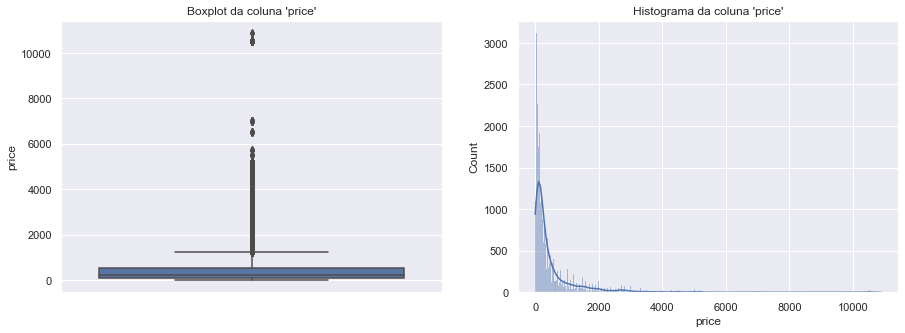

,feature,average,min,median,max,std_deviation
statistcs,price,513.037803,1.0,199.99,10879.95,859.110002


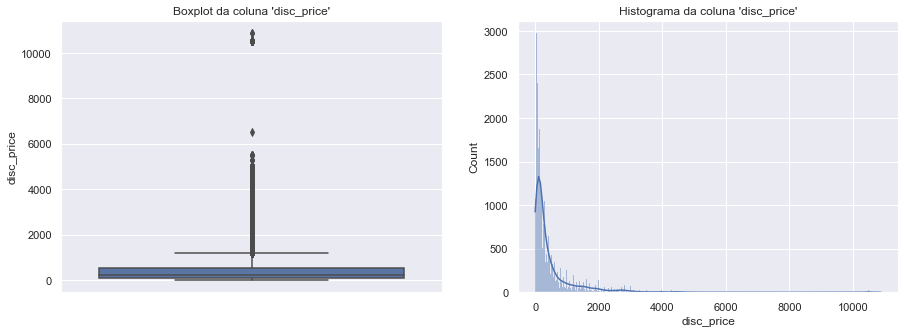

,feature,average,min,median,max,std_deviation
statistcs,disc_price,494.104295,1.0,199.0,10879.95,808.588973


<Figure size 1080x360 with 0 Axes>

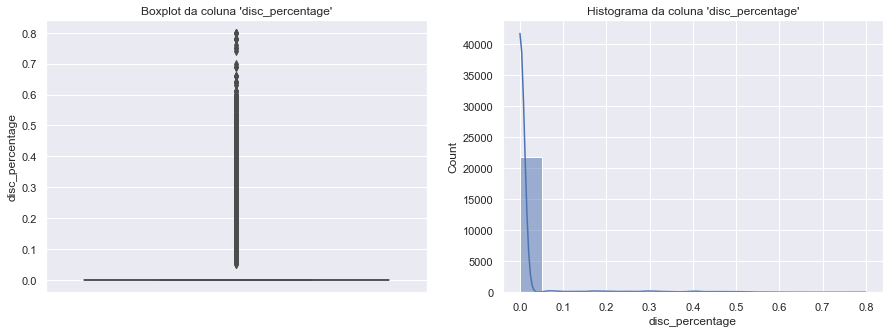

,feature,average,min,median,max,std_deviation
statistcs,disc_percentage,0.016933,0.0,0.0,0.8,0.077849


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

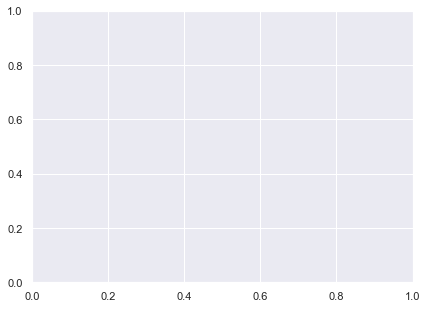

In [270]:
exploratori(df3)

## 3.2 Bivariate Analysis

- Qual categoria mais vende?
- Produtos com ticket mais baixo vendem mais.
- Produtos com desconto vendem mais.
- Qual o principal distribuidor?
- Finais de semana vendem mais.
- Dezembro é o mês que mais vende.
- Há mais vendas no início do mês.

### 3.2.1 Qual categoria mais vende?
- Televisores

In [162]:
df3[['date_imp', 'category_name']].groupby('category_name').count().sort_values('date_imp', ascending=False).reset_index()

,category_name,date_imp
0,"tv, television, video",2130
1,"laptop, computer",1715
2,"speaker, portable, bluetooth",1104
3,"camera, mirrorless, photo",1072
4,"car, speaker, subwoofer",865
5,"receiver, amplifier, home",817
6,"camera, shoot",744
7,"drive, storage, hard",719
8,"drive, storage, internal",718
9,"car, receiver, dash",712


### 3.2.2 Produtos com ticket mais baixo vendem mais.
- Falso. O ticket da categoria não parece interferir nas vendas.

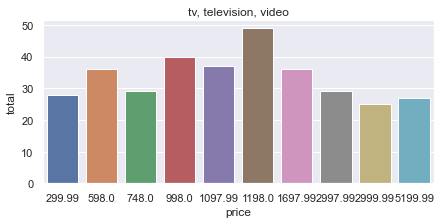

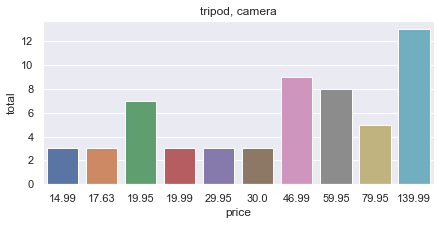

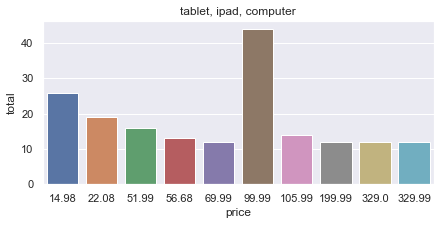

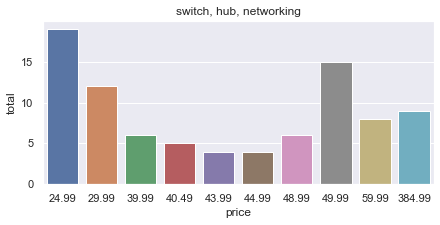

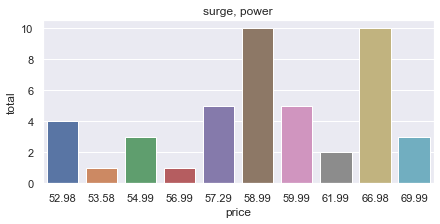

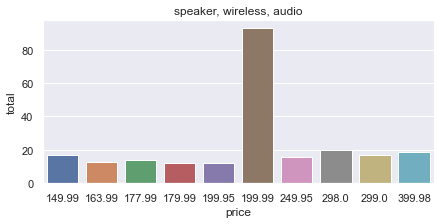

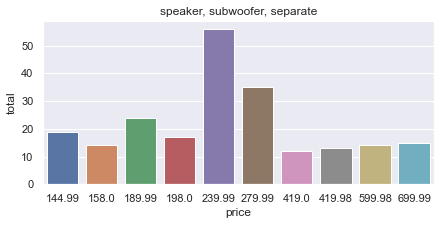

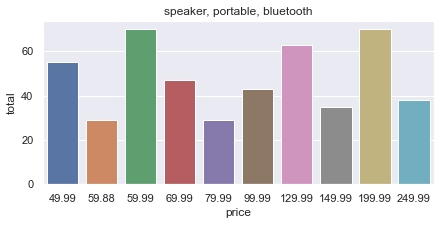

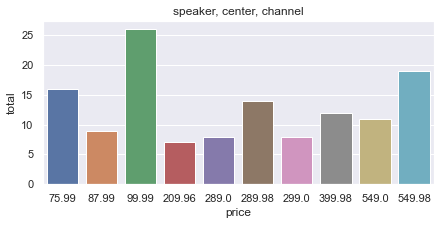

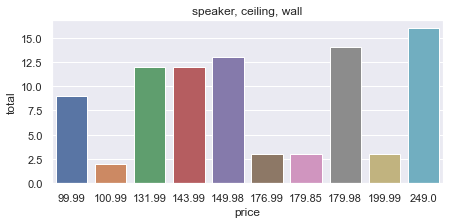

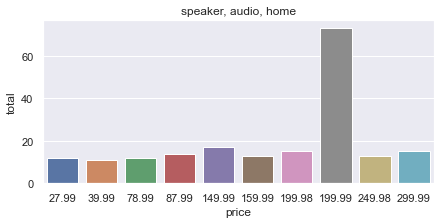

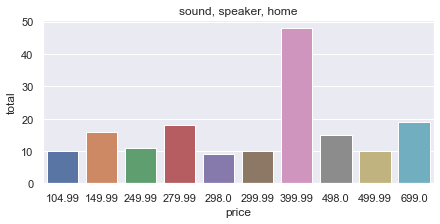

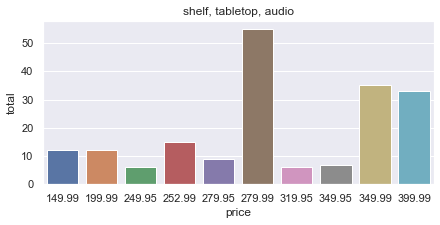

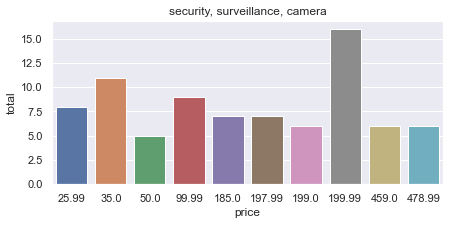

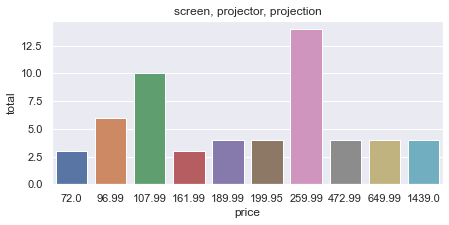

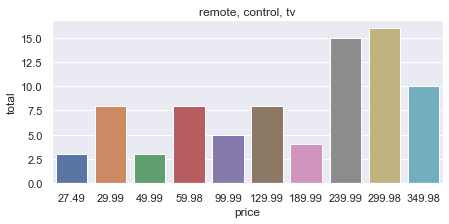

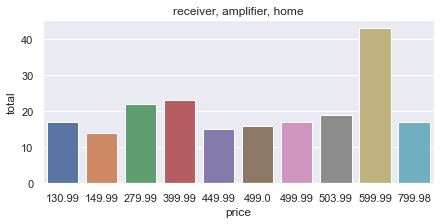

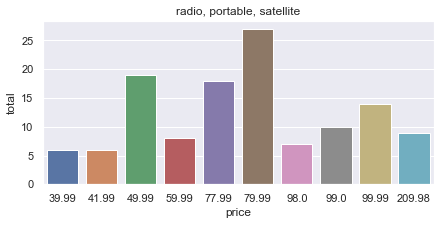

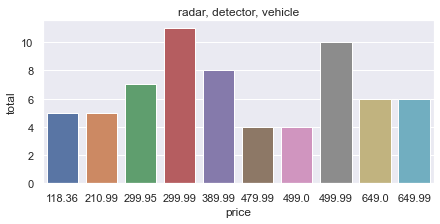

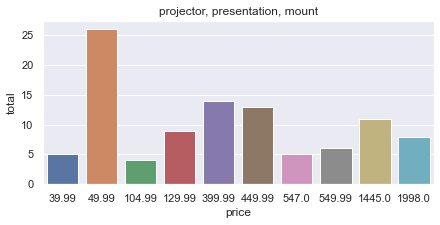

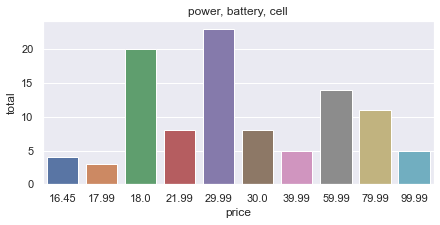

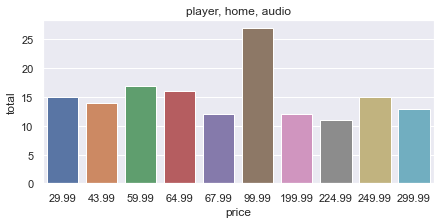

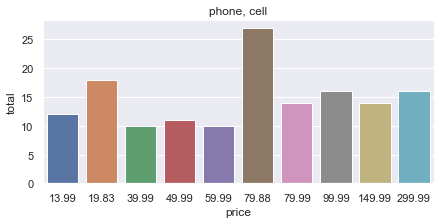

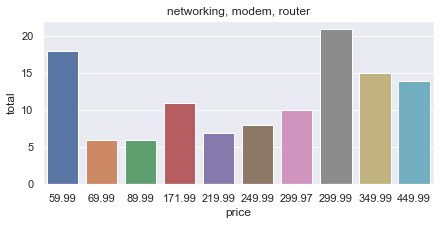

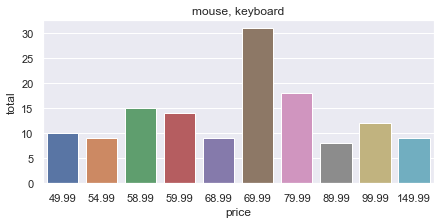

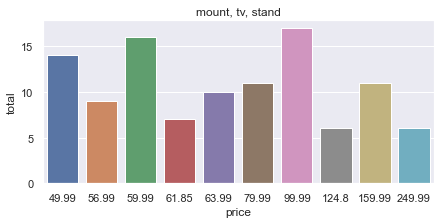

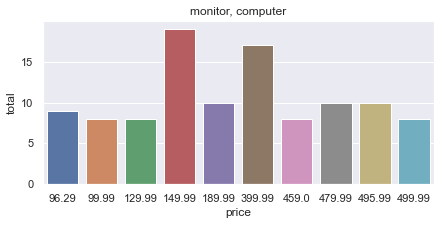

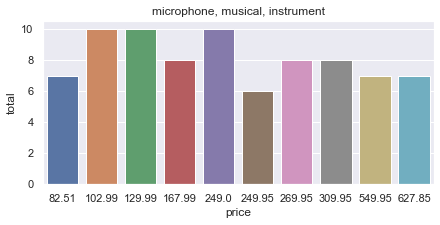

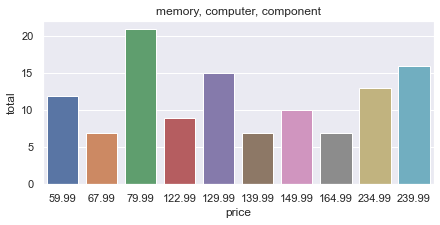

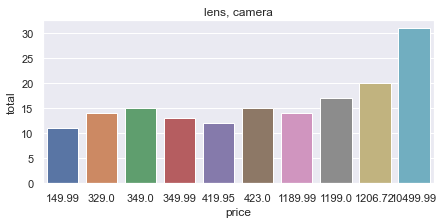

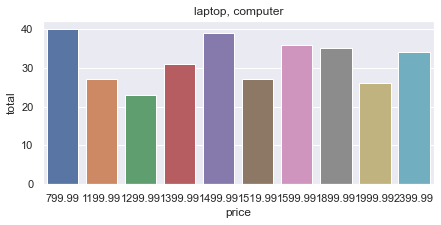

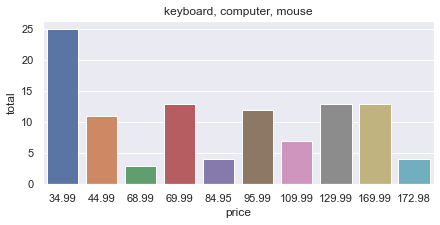

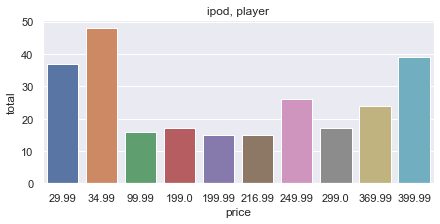

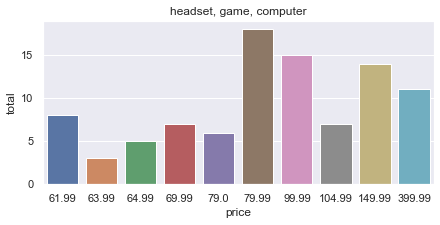

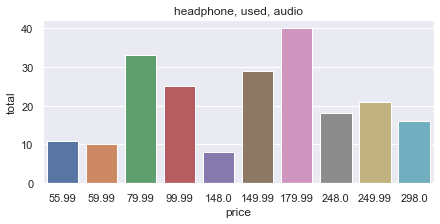

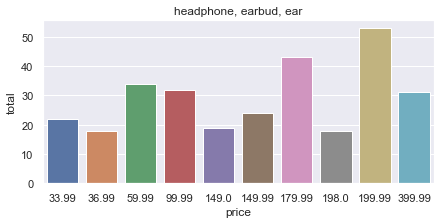

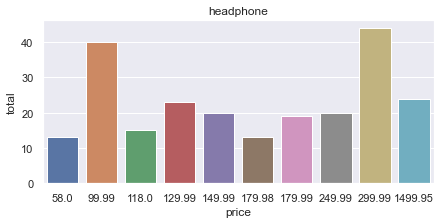

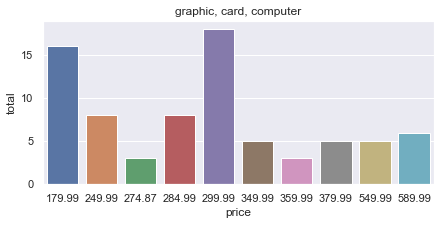

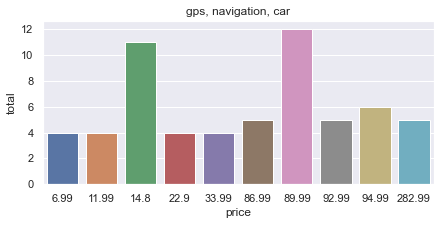

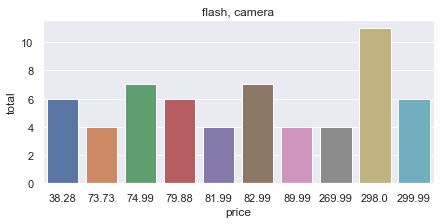

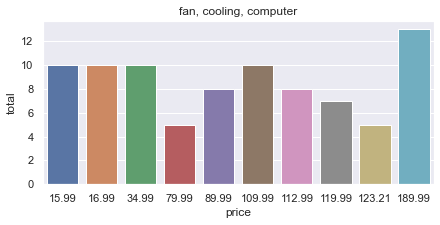

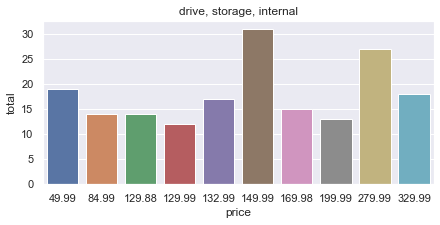

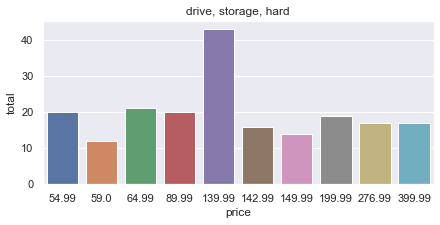

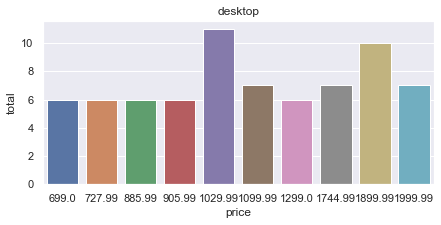

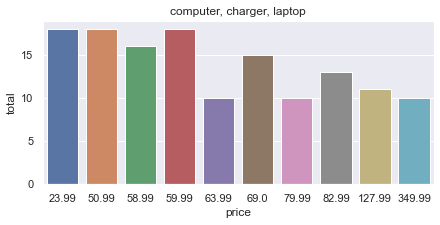

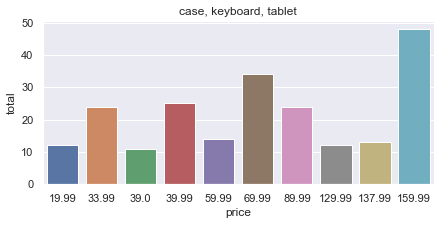

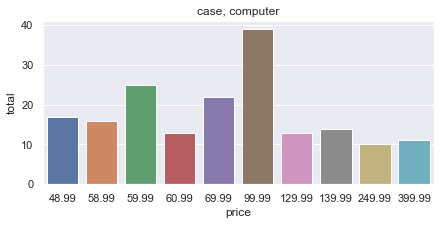

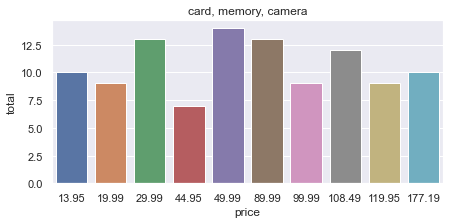

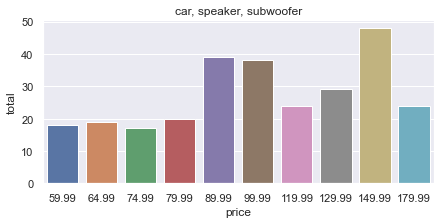

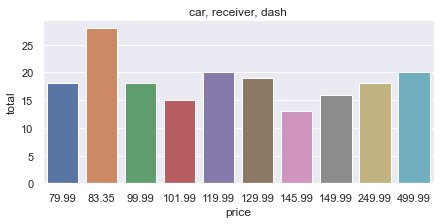

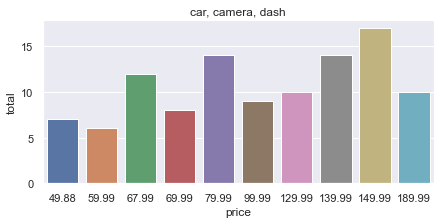

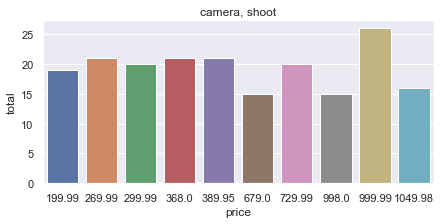

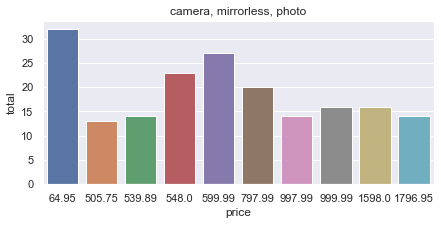

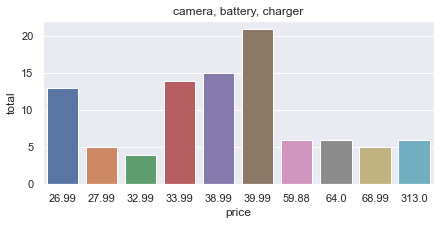

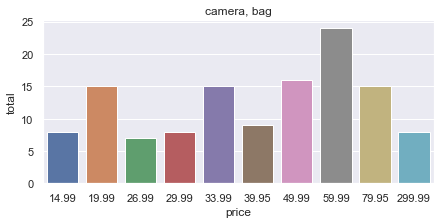

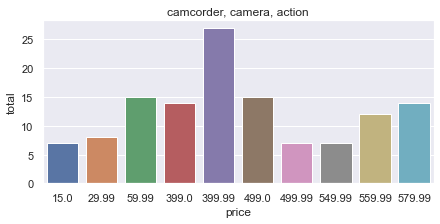

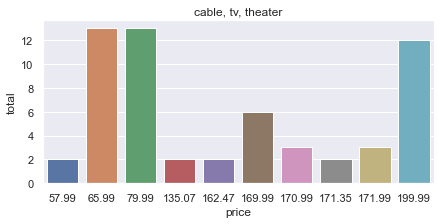

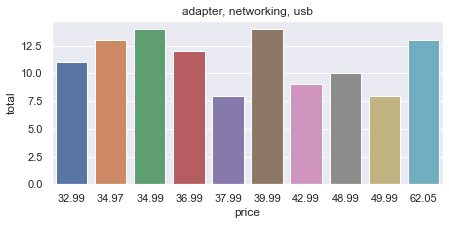

In [223]:
aux1 = df3[['price', 'category_name', 'name']].groupby(['category_name', 'price']).count().sort_values(['category_name','name'], ascending=False).reset_index().rename(columns={'name':'total'})

sns.set(rc={'figure.figsize':(7,3)})
for n in aux1['category_name'].unique():
    ax = sns.barplot(data=aux1[aux1['category_name'] == n].head(10).sort_values('total', ascending=False), x='price', y='total')
    ax.set_title(n)
    
    plt.show()

### 3.2.3 Produtos com desconto vendem mais.
- Falso. Existe uma dendencia dos itens sem desconto venderem mais

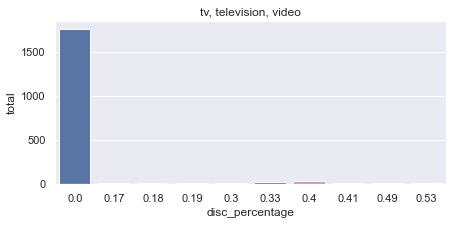

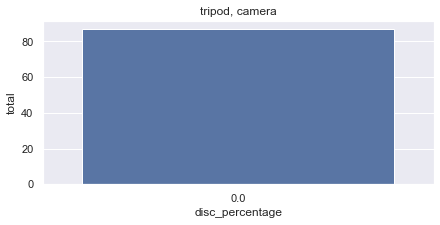

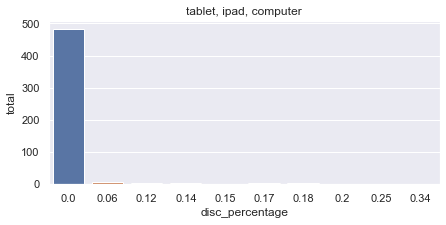

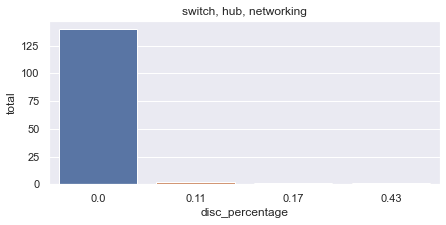

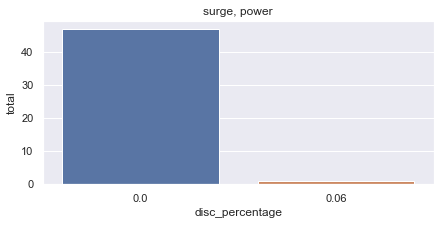

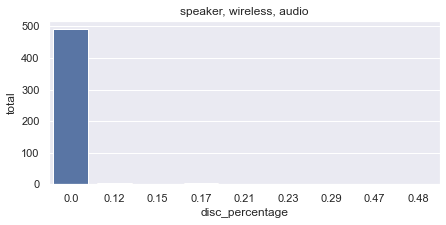

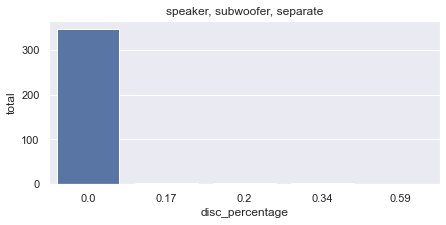

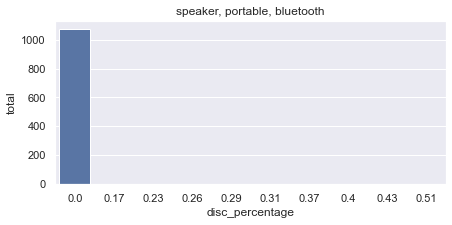

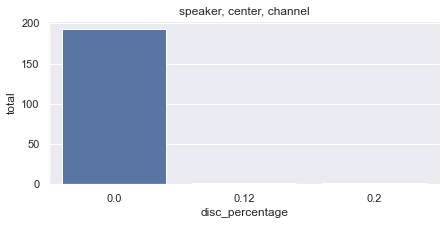

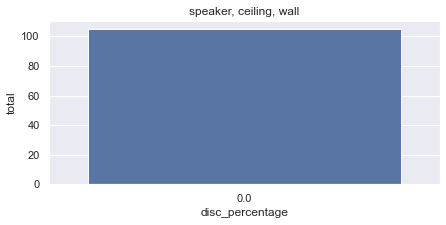

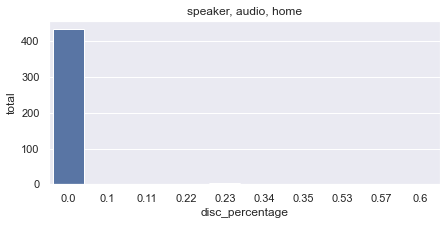

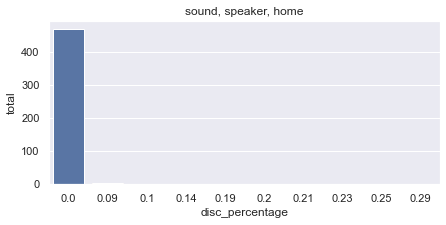

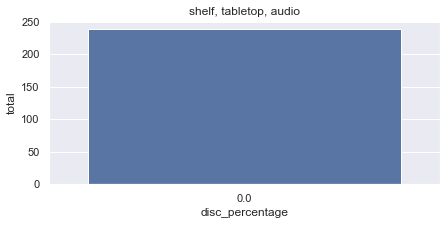

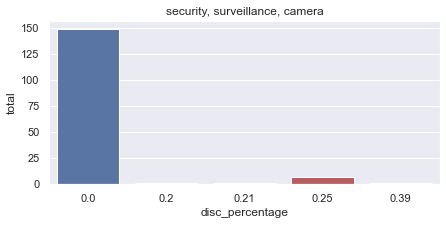

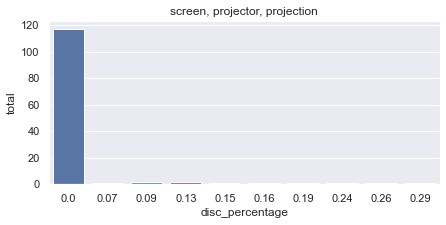

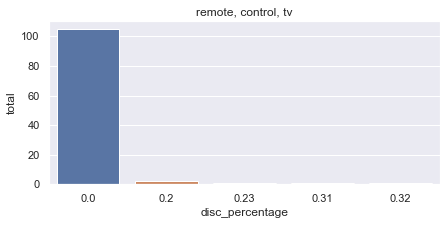

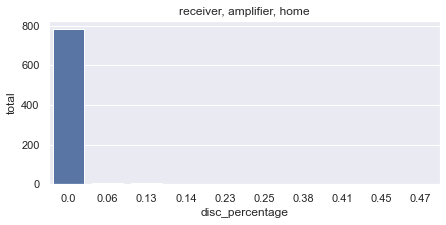

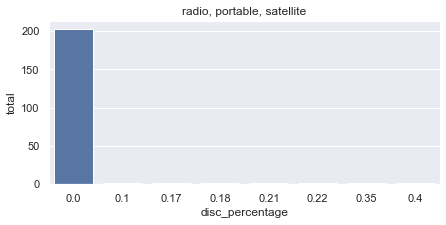

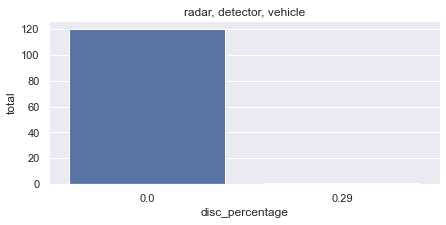

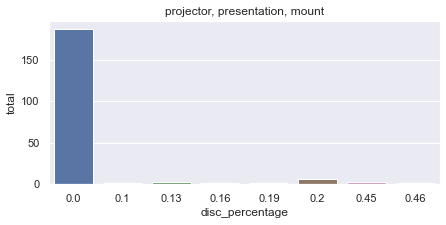

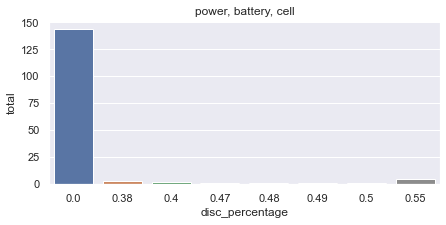

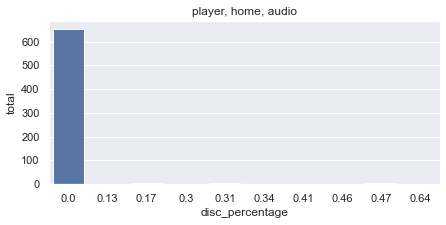

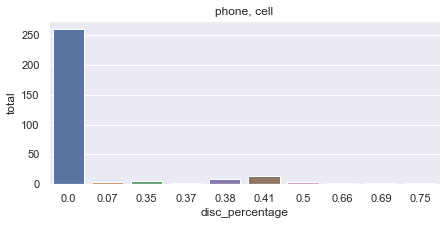

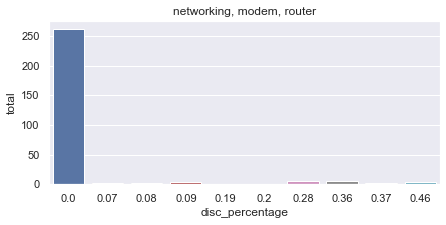

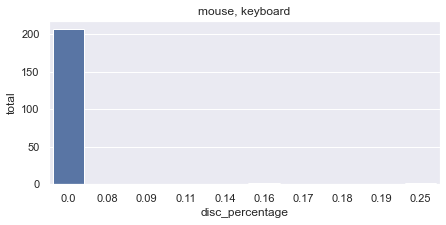

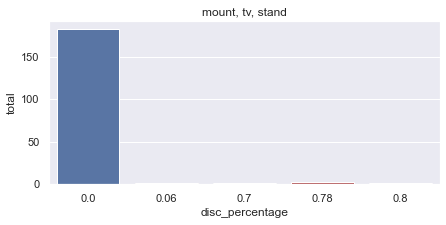

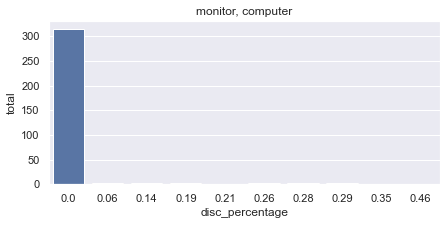

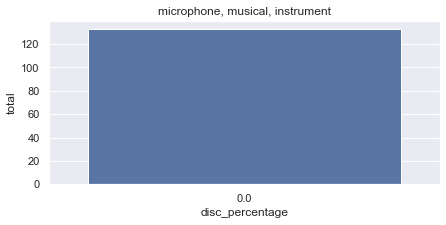

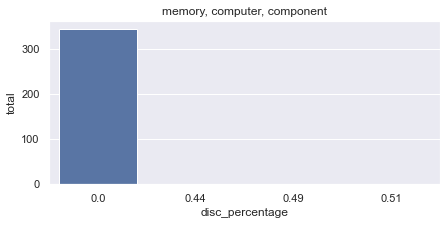

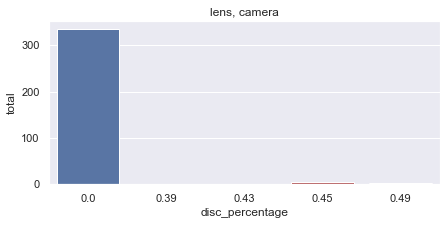

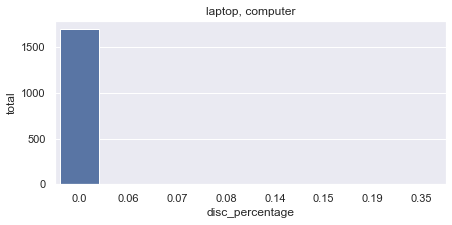

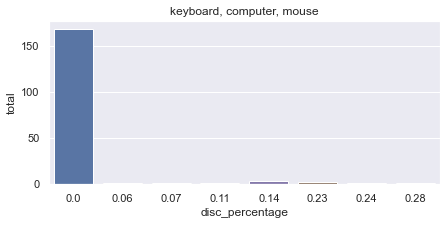

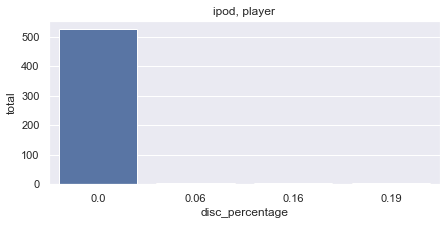

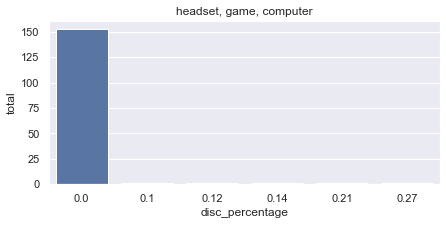

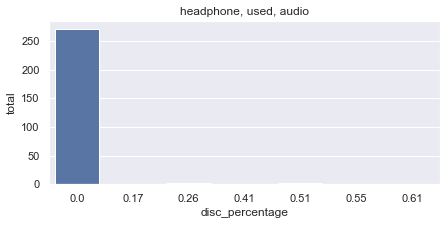

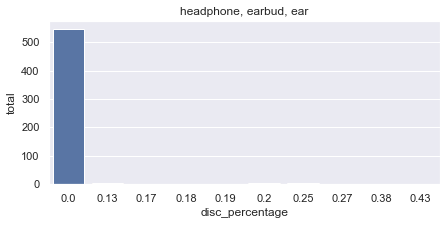

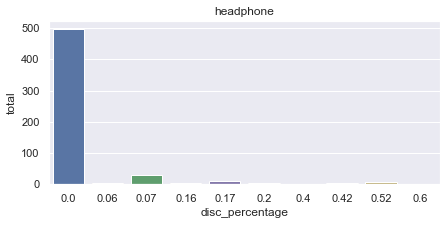

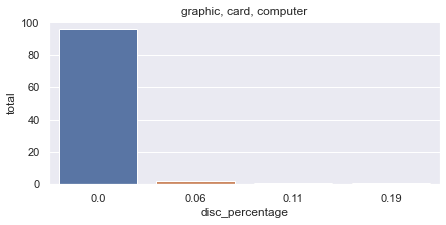

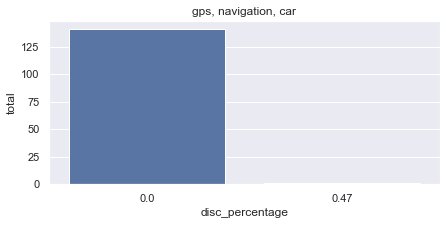

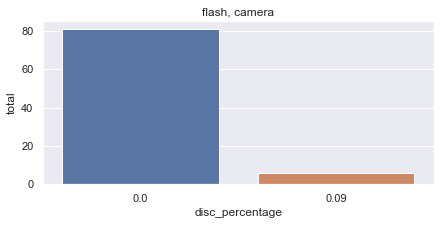

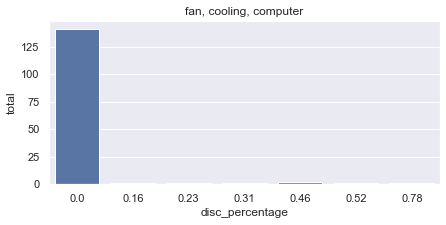

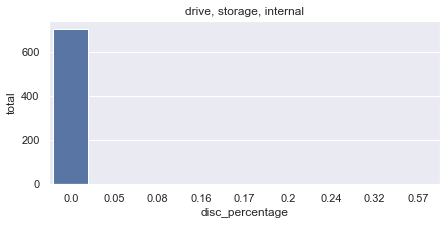

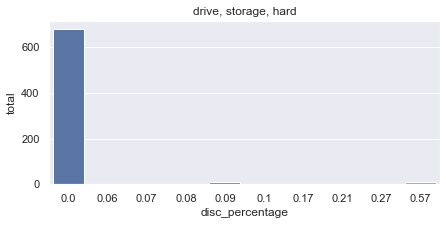

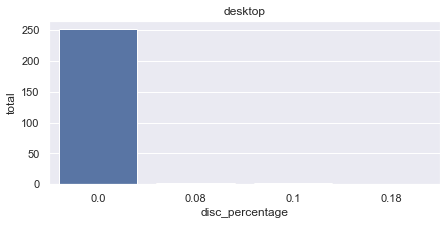

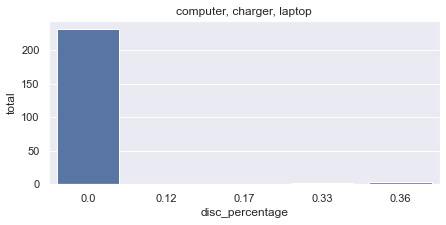

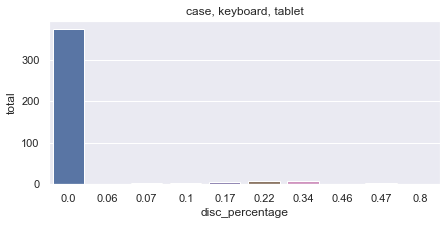

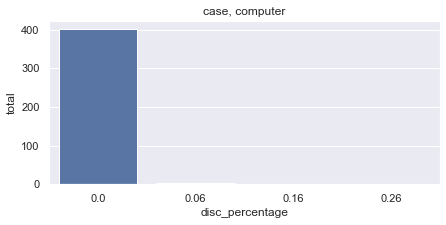

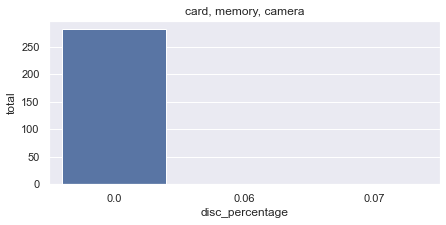

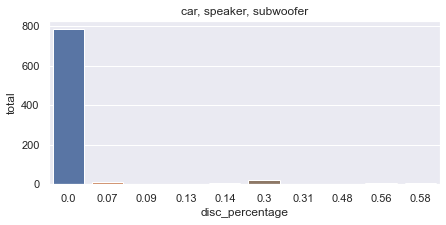

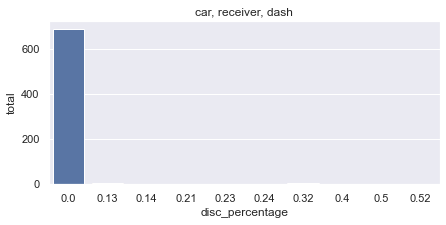

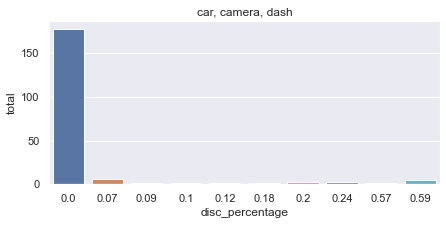

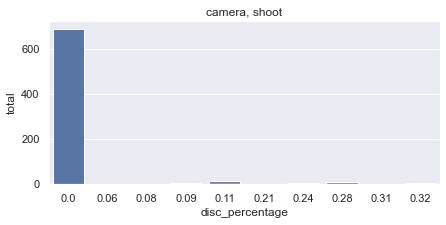

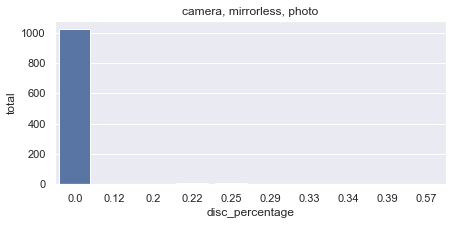

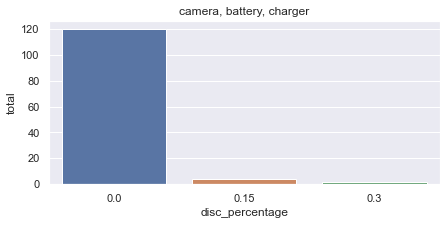

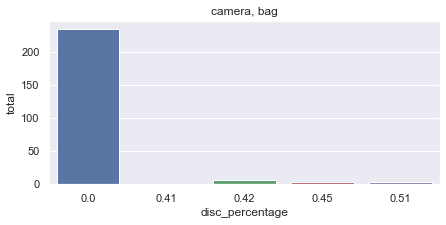

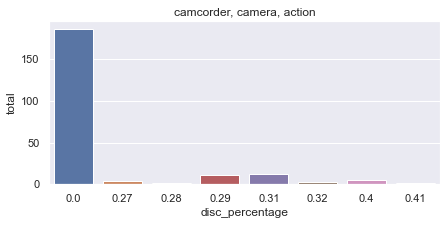

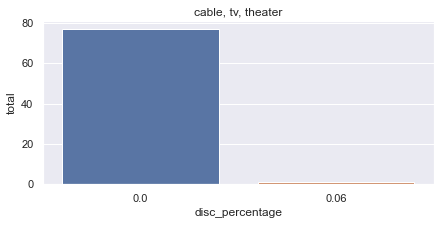

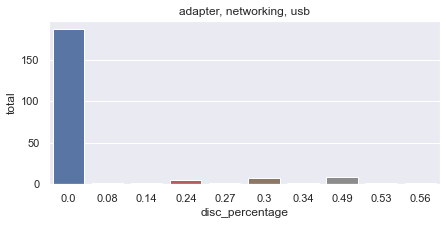

In [222]:
aux1 = df3[['category_name', 'disc_percentage', 'name']].groupby(['category_name', 'disc_percentage']).count().sort_values(['category_name','name'], ascending=False).reset_index().rename(columns={'name':'total'})

for n in aux1['category_name'].unique():
    ax = sns.barplot(data=aux1[aux1['category_name'] == n].sort_values('total', ascending=False).head(10), x='disc_percentage', y='total' )
    ax.set_title(n)
    plt.show()

### 3.2.4 Qual o principal distribuidor?
- Bestbuy

In [228]:
df3[['merchant', 'name']].groupby('merchant').count().sort_values('name', ascending=False).reset_index().rename(columns={'name':'total'}).head(1)

,merchant,total
0,Bestbuy.com,11287


### 3.2.5 Finais de semana vendem mais.
- Falso. O principal dia de venda é a quinta feira.

<AxesSubplot:xlabel='day_n', ylabel='total'>

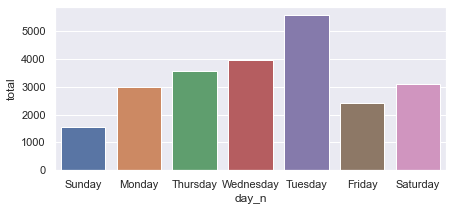

In [241]:
aux1 = df1[['day_n', 'name']].groupby('day_n').count().rename(columns={'name':'total'}).T
aux1 = aux1[['Sunday', 'Monday', 'Thursday', 'Wednesday', 'Tuesday', 'Friday', 'Saturday']].T.reset_index()

sns.barplot(data=aux1, x='day_n', y='total')

### 3.2.6 Dezembro é o mês que mais vende
- Falso. O mês que mais vende é Agosto

<AxesSubplot:xlabel='month', ylabel='total'>

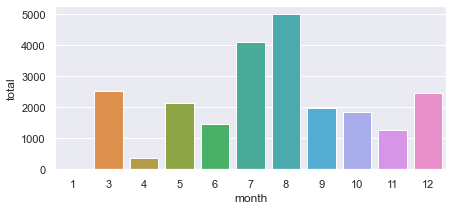

In [244]:
aux1 = df3[['month', 'name']].groupby('month').count().reset_index().rename(columns={'name':'total'})

sns.barplot(data=aux1, x='month', y='total')

### 3.2.7 Há mais vendas no início do mês.
- Verdadeiro. O início do mês vende mais

<AxesSubplot:xlabel='day', ylabel='total'>

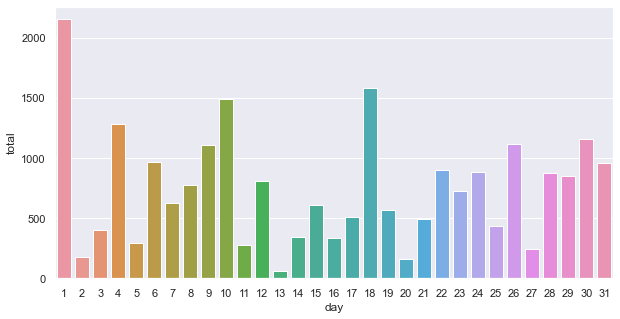

In [250]:
aux1 = df3[['day', 'name']].groupby('day').count().reset_index().rename(columns={'name':'total'})

sns.set(rc={'figure.figsize':(10,5)})

sns.barplot(data=aux1, x='day', y='total')

## 3.3 Multivariate Analysis

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

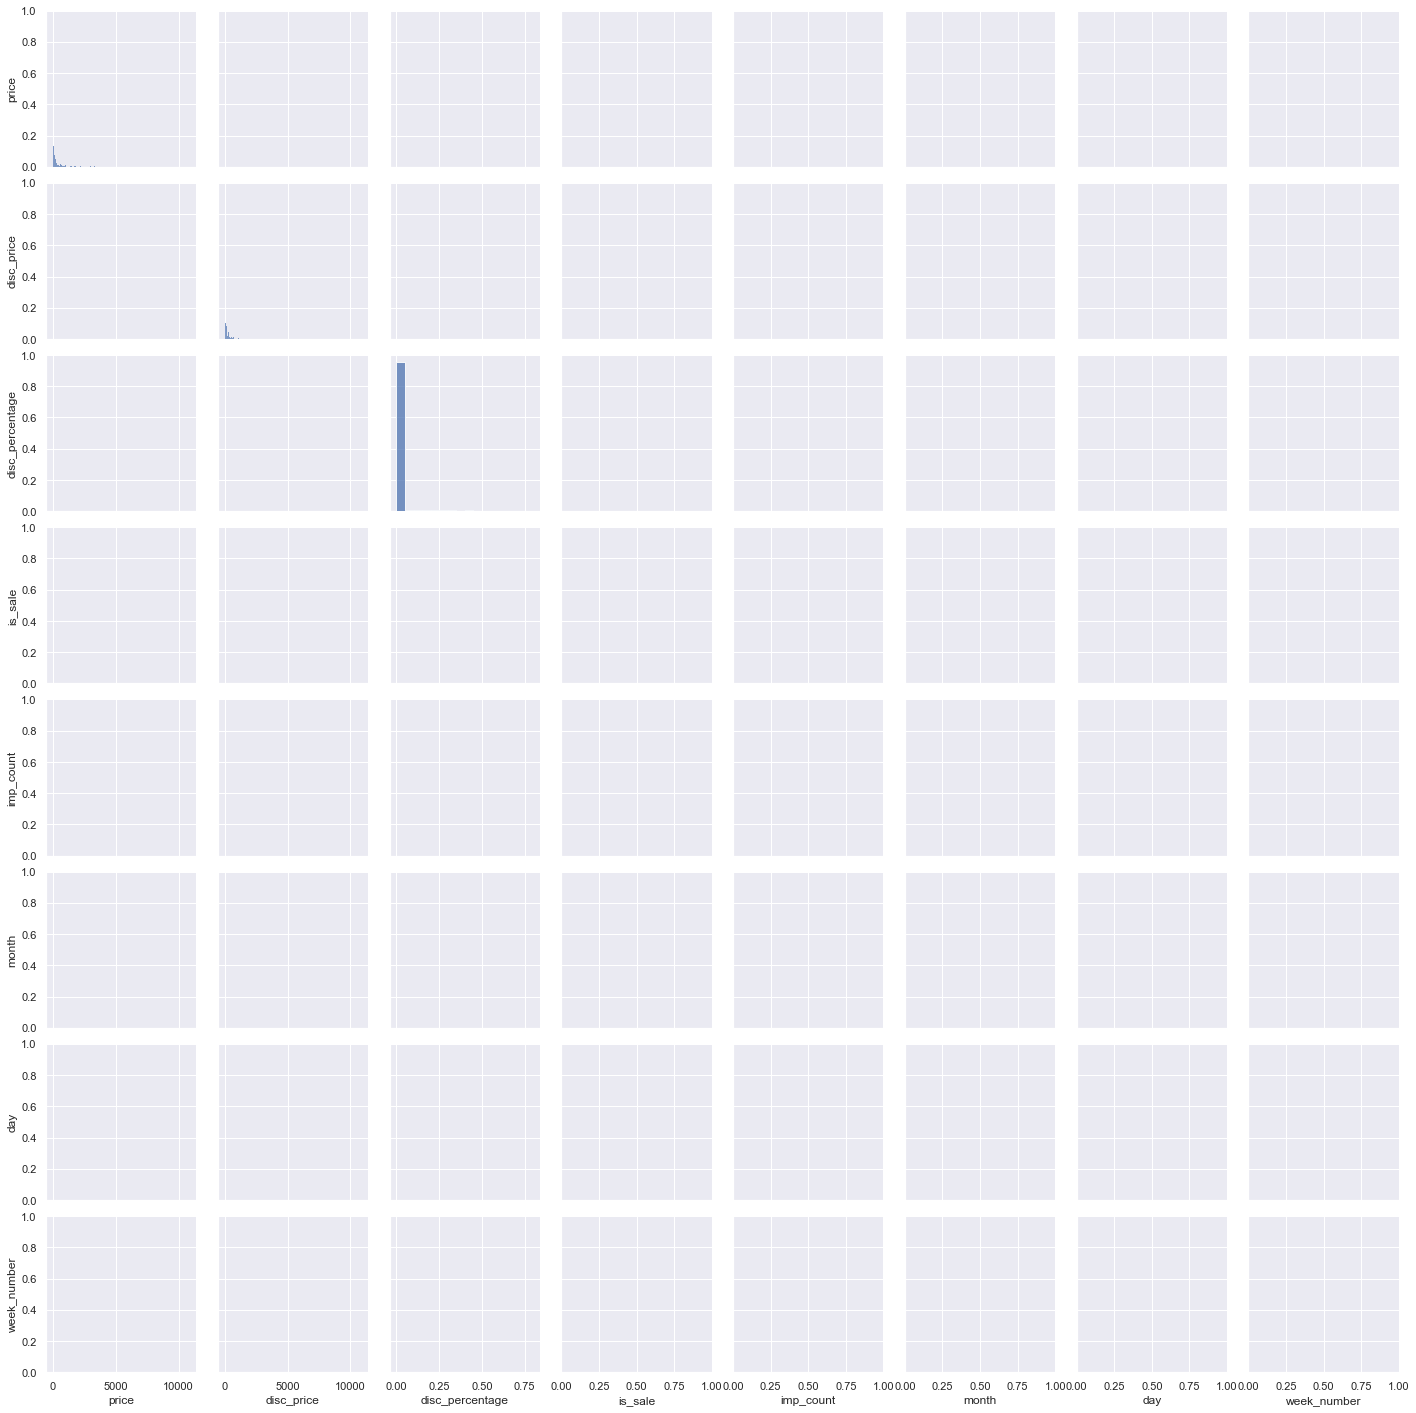

In [273]:
display(HTML("<h1>Pair Plot</h1>"))
sns.pairplot(df3)

# 4.0